In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

co2_file = "co2_mm_mlo.csv"

co2 = pd.read_csv(co2_file,skiprows=56)

In [4]:
co2.describe()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,1990.292465,6.490421,1990.791039,358.150128,358.138557,18.987229,-2.125709,-0.101903
std,18.850944,3.451468,18.848900,30.935353,30.862366,12.055385,4.550319,0.514494
min,1958.000000,1.000000,1958.202700,312.430000,314.430000,-1.000000,-9.990000,-0.990000
25%,1974.000000,3.500000,1974.500000,330.010000,330.405000,4.500000,-4.920000,0.030000
50%,1990.000000,6.000000,1990.791700,354.350000,354.900000,25.000000,0.390000,0.150000
75%,2007.000000,9.000000,2007.083350,382.980000,383.025000,28.000000,0.560000,0.210000
max,2023.000000,12.000000,2023.375000,424.000000,420.650000,31.000000,1.310000,0.580000


<Axes: xlabel='year'>

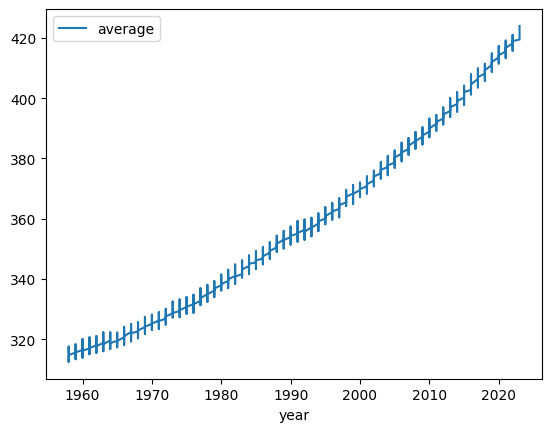

In [5]:
co2.plot('year','average')

<Axes: xlabel='ndays', ylabel='Count'>

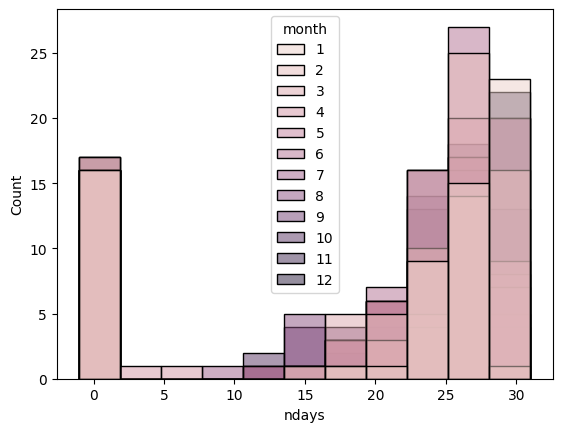

In [10]:
sns.histplot(co2, x = 'ndays', hue='month')

<Axes: xlabel='ndays', ylabel='count'>

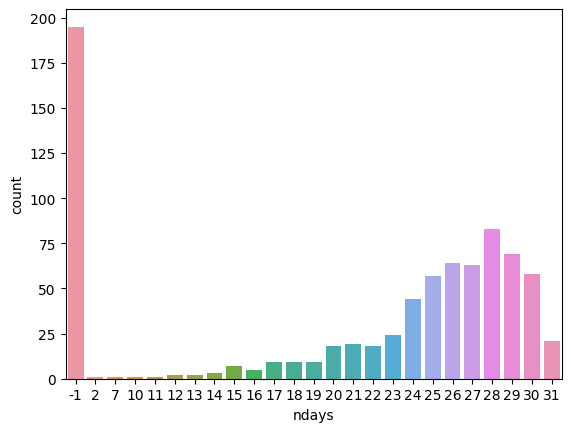

In [11]:
sns.countplot(data = co2, x = 'ndays')

In [13]:
import plotly.express as px
px.histogram(co2, x = 'ndays', color = 'ndays')

<Axes: xlabel='average', ylabel='Count'>

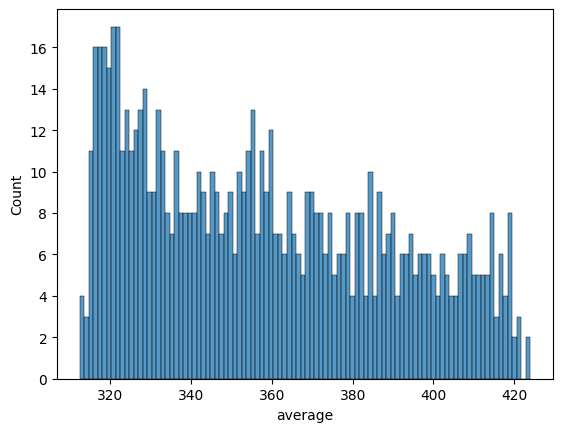

In [16]:
sns.histplot(data = co2, x = 'average',bins = 100)


In [21]:
fig = px.histogram(co2, x='average', nbins=50)
fig.show()

In [26]:


import plotly.express as px
import plotly.graph_objects as go

# Histogram plot
fig = px.histogram(co2, x='average', nbins=30)

# Rug plot
rug_trace = go.Scatter(x=co2['average'], y=[0] * len(co2), mode='markers', marker=dict(color='red'), showlegend=False)

# Add rug plot to the figure
fig.add_trace(rug_trace)

# Show the combined plot
fig.show()



In [25]:
import plotly.express as px

fig = px.histogram(co2, x='average', marginal='rug', nbins=30, histnorm='density')
fig.update_traces(marker_color='rgba(0,0,0,0.5)', selector=dict(type='histogram'))
fig.show()

In [27]:
import plotly.express as px

fig = px.box(co2, y='deseasonalized')
fig.show()


In [28]:
import numpy as np

avg = co2["deseasonalized"]
q1 = np.percentile(avg,25)
median = np.percentile(avg,50)
q3 = np.percentile(avg,75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, median, q3, whisk2

(251.47499999999997, 330.405, 354.9, 383.025, 461.955)

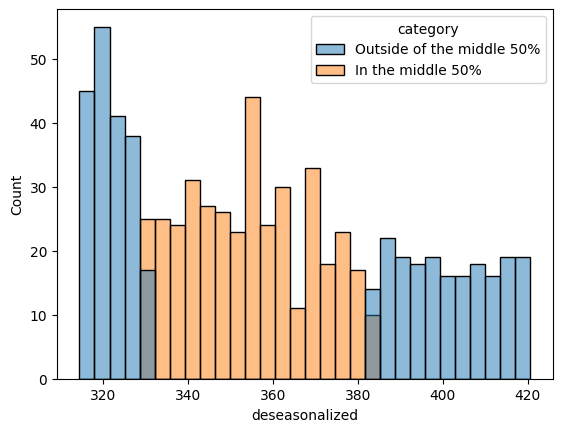

In [49]:
co2['category'] = None
co2.loc[(co2['deseasonalized'] < q1) | (co2['deseasonalized'] > q3), 'category'] = 'Outside of the middle 50%'
co2.loc[(co2['deseasonalized'] > q1) & (co2['deseasonalized'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(co2, x = 'deseasonalized', hue = 'category', bins = 30);

co2.drop(columns = ['category'], inplace = True)

In [29]:
px.violin(co2, y='deseasonalized')

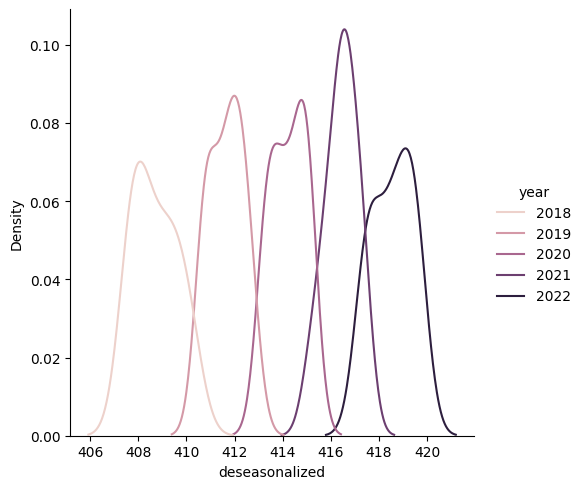

In [51]:
sns.displot(data = co2_rec, x = 'deseasonalized', kind = 'kde', hue = 'year');

<Axes: xlabel='year', ylabel='deseasonalized'>

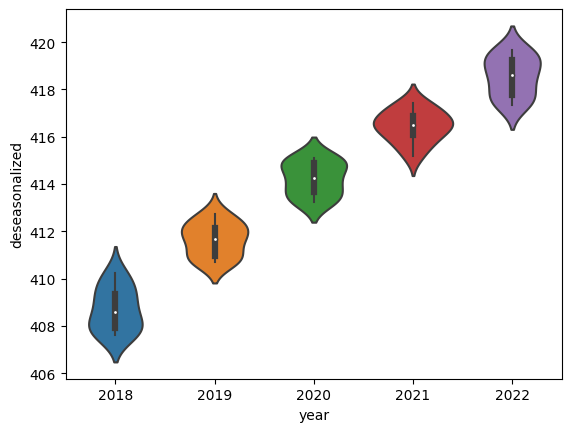

In [47]:

co2_rec = co2[co2["year"].isin([2022, 2021, 2020, 2019, 2018])]
sns.violinplot(data=co2_rec, x='year', y='deseasonalized')


In [48]:

fig = px.violin(co2_rec, x='year', y='deseasonalized')

fig.show()


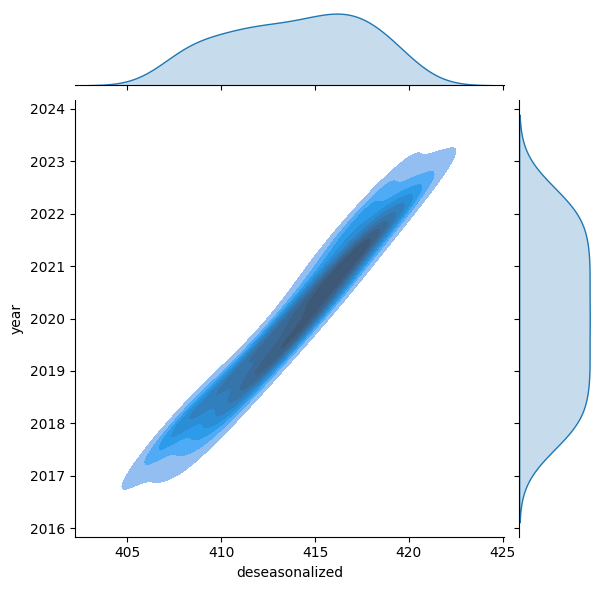

In [52]:
sns.jointplot(data = co2_rec, x = 'deseasonalized', y = 'year', kind = 'kde', fill = True);